### By Bernardo Vimpi

## SIMPLE LENEAR REGRESSION 

###### This is a small project which analyzes the relationship between Price and Size of real estate properties.

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib as plt
import seaborn as sns
import sklearn

In [2]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm # it will be used to run linear regression

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_3c067c516d034f55a561569b62033ff9 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='hVa7tkdwepp1lSQF_bESTdt47Df0-WHVp8WwNKcBAINl',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_3c067c516d034f55a561569b62033ff9.get_object(Bucket='realestatepricevssize-donotdelete-pr-z1yakxgqxxdade',Key='real_estate_price_size[1].csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()


,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [4]:
df_data_0

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
5,245050.280,575.19
6,265129.064,570.89
7,175716.480,620.82
8,331101.344,682.26
9,218630.608,694.52


### LETS DESCRIBE THE DATA

In [5]:
df_data_0.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


## DEFINE THE VARIABLES

In [6]:
# In this case our dependent variable (y) is price. This will be represeted by the 'y' variable. Our independent variable is size (x1).
y= df_data_0['price']
x1= df_data_0['size']


### DATA EXPLORATION

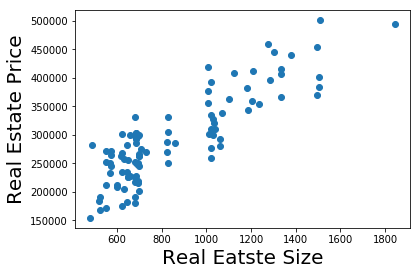

In [7]:
# using matplotlib
plt.scatter(x1,y)
plt.xlabel('Real Eatste Size', fontsize= 20)
plt.ylabel('Real Estate Price',fontsize= 20)
plt.show()

### Lets run the REGRESSION

In [8]:
# Here I run the code to estimate the intercept of B0
x=sm.add_constant(x1) # this is using statmodel
results = sm.OLS(y, x).fit()
results.summary()

/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           8.13e-31
Time:                        20:12:43   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## LETS PLOT THE REGRESSION LINE

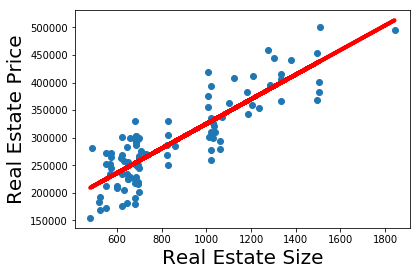

In [9]:
plt.scatter(x1,y)
yhat= 1.019e+05 + 223.1787 * x1
fig= plt.plot(x1, yhat, lw = 4, c='red', label = 'regression line')
plt.xlabel ('Real Estate Size', fontsize=20)
plt.ylabel('Real Estate Price', fontsize=20)
plt.show()

### Importing and Using Seaborn

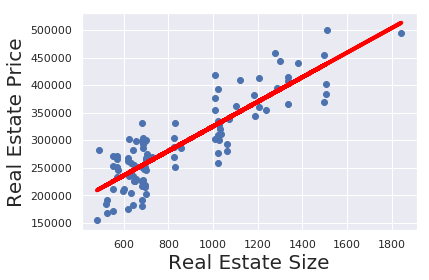

In [10]:
import seaborn as sns
sns.set()
plt.scatter(x1,y)
yhat= 1.019e+05 + 223.1787 * x1
fig= plt.plot(x1, yhat, lw = 4, c='red', label = 'regression line')
plt.xlabel ('Real Estate Size', fontsize=20)
plt.ylabel('Real Estate Price', fontsize=20)
plt.show()